In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2
from tqdm import tqdm
import tensorflow as tf
from tensorflow import keras

DATADIR = "/home/leo/Desktop/Programming/Animals/animals10"

CATEGORIES = ["Butterfly", "Cat", "Chicken", "Cow", "Dog", "Elephant", "Horse", "Sheep", "Spider", "Squirrel"]

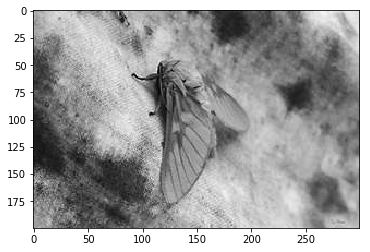

In [2]:
for category in CATEGORIES:  # do dogs and cats
    path = os.path.join(DATADIR,category)  # create path to dogs and cats
    for img in os.listdir(path):  # iterate over each image per dogs and cats
        img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
        plt.imshow(img_array, cmap='gray')  # graph it
        plt.show()  # display!

        break  # we just want one for now so break
    break  #...and one more

In [3]:
print(img_array)

[[141 139 138 ... 202 204 205]
 [147 143 140 ... 199 201 202]
 [164 155 147 ... 197 198 200]
 ...
 [143 143 138 ... 162 164 166]
 [150 146 136 ... 163 164 166]
 [147 143 137 ... 164 165 166]]


In [4]:
print(img_array.shape)

(200, 300)


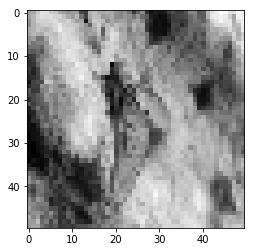

In [5]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

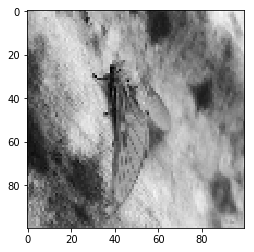

In [6]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [7]:
training_data = []

def create_training_data():
    for category in CATEGORIES:  # do dogs and cats

        path = os.path.join(DATADIR,category)  # create path to dogs and cats
        class_num = CATEGORIES.index(category)  # get the classification  (0 or a 1). 0=dog 1=cat

        for img in tqdm(os.listdir(path)):  # iterate over each image per dogs and cats
            try:
                img_array = cv2.imread(os.path.join(path,img) ,cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                training_data.append([new_array, class_num])  # add this to our training_data
            except Exception as e:  # in the interest in keeping the output clean...
                print("Error")
                pass
            #except OSError as e:
            #    print("OSErrroBad img most likely", e, os.path.join(path,img))
            #except Exception as e:
            #    print("general exception", e, os.path.join(path,img))

create_training_data()

print(len(training_data))

100%|██████████| 1862/1862 [00:01<00:00, 996.41it/s] 

26179


In [8]:
import random

random.shuffle(training_data)


In [10]:
for sample in training_data[:10]:
    print(sample[1])

7
1
8
6
8
8
3
8
0
1


In [18]:
X = []
y = []


for features,label in training_data:
    X.append(features)
    y.append(label)
    


print(X[0].reshape(-1, IMG_SIZE, IMG_SIZE, 1))



X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)


[[[[ 74]
   [ 71]
   [ 65]
   ...
   [102]
   [119]
   [159]]

  [[ 67]
   [ 69]
   [ 66]
   ...
   [ 80]
   [120]
   [122]]

  [[ 66]
   [ 69]
   [ 69]
   ...
   [ 70]
   [124]
   [ 82]]

  ...

  [[173]
   [146]
   [161]
   ...
   [ 34]
   [ 23]
   [ 34]]

  [[161]
   [157]
   [154]
   ...
   [ 32]
   [ 26]
   [ 33]]

  [[184]
   [169]
   [163]
   ...
   [ 25]
   [ 39]
   [ 28]]]]


In [19]:
class myCallback(tf.keras.callbacks.Callback):
          def on_epoch_end(self, epoch, logs={}):
                if (logs.get('accuracy')>0.90):
                      print("\nReached 90% accuracy so cancelling training!")
                      self.model.stop_training = True

In [20]:
callbacks = myCallback()

In [21]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation = 'relu', input_shape = (100, 100, 1)),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Conv2D(64, (3, 3), activation = 'relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(512, activation = 'relu'),
    tf.keras.layers.Dense(10, activation = 'softmax'),
])

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 98, 98, 16)        160       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 49, 49, 16)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 47, 47, 32)        4640      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 10, 10, 64)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 8, 8, 64)         

In [23]:
model.compile(optimizer = 'sgd', loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [24]:
model.fit(X, y, epochs = 40, callbacks = [callbacks], validation_split = 0.1)

Train on 23561 samples, validate on 2618 samples
Epoch 1/40
23561/23561 [==============================] - 109s 5ms/sample - loss: 2.5229 - acc: 0.1859 - val_loss: 2.2237 - val_acc: 0.1761
Epoch 2/40
23561/23561 [==============================] - 109s 5ms/sample - loss: 2.1978 - acc: 0.1914 - val_loss: 2.1924 - val_acc: 0.2135
Epoch 3/40
23561/23561 [==============================] - 108s 5ms/sample - loss: 2.0218 - acc: 0.3050 - val_loss: 2.1950 - val_acc: 0.2628
Epoch 4/40
23561/23561 [==============================] - 108s 5ms/sample - loss: 1.8660 - acc: 0.3594 - val_loss: 1.8247 - val_acc: 0.3663
Epoch 5/40
23561/23561 [==============================] - 108s 5ms/sample - loss: 1.7193 - acc: 0.4117 - val_loss: 1.9335 - val_acc: 0.3300
Epoch 6/40
23561/23561 [==============================] - 108s 5ms/sample - loss: 1.6307 - acc: 0.4412 - val_loss: 1.6996 - val_acc: 0.4114
Epoch 7/40
23561/23561 [==============================] - 108s 5ms/sample - loss: 1.5561 - acc: 0.4702 - val_lo

In [25]:
model.save("animals10.h5")